# 🔷 Overview

Random Forest (**RF**) is a powerful ensemble learning algorithm used for **classification tasks** based on multiple decision trees. Instead of relying on a single tree, RF builds a **"forest"** of decision trees and combines their predictions, making it a **robust and accurate** model for various applications. RF classifiers are widely used in **finance, healthcare, fraud detection, image recognition, and recommendation systems**.

## ❓ What is Random Forest?

Random Forest classifiers use a **bagging (Bootstrap Aggregation) approach** to train multiple decision trees on different subsets of the dataset. Each tree makes its own prediction, and the **majority vote** (for classification) or the **average prediction** (for regression) determines the final output.  
**RF performs well** in many applications, especially with **high-dimensional data and noisy datasets**.

## 🔥 Popular Random Forest Variants:

- **Standard Random Forest** 🌲: Uses bootstrap sampling and feature randomness for better generalization.
- **Extra Trees (Extremely Randomized Trees)** 🌳: Similar to RF but selects split points randomly instead of optimizing them.
- **Rotation Forest** 🔄: Applies PCA to feature subsets before training individual trees for enhanced diversity.
- **Oblique Random Forest** 📐: Uses linear combinations of features at splits for improved decision boundaries.

---

# 🌲 The Random Forest Formula:

A **Random Forest (RF)** model makes predictions by aggregating results from multiple **Decision Trees**, reducing overfitting and increasing accuracy.

## 🔢 Mathematically, it combines multiple Decision Trees:
$$
\hat{Y} = \frac{1}{T} \sum_{t=1}^{T} f_t(X)
$$

## 🔍 Where:
- **$\hat{Y}$** → Final prediction, obtained by averaging (for regression) or majority voting (for classification).
- **$T$** → Total number of Decision Trees in the forest.
- **$X$** → Input feature vector for which we predict the output.
- **$f_t(X)$** → Prediction of the **$t^{th}$** Decision Tree in the ensemble.
- **$\sum_{t=1}^{T}$** → Summation over all Decision Trees in the Random Forest.

---

## 📌 Understanding Random Forest:
Random Forest works by training multiple Decision Trees on **random subsets** of the dataset and averaging their predictions. It uses **bagging (Bootstrap Aggregating)** and **feature randomness** to improve generalization.

---

## 🔑 Key Components of Random Forest:
✔ **Bootstrapping (Bagging)** → Each tree is trained on a random sample (with replacement) from the dataset.  
✔ **Feature Randomness** → Each tree considers a random subset of features when splitting nodes, preventing overfitting.  
✔ **Ensemble Learning** → Combines weak learners (Decision Trees) into a strong learner for better performance.  

---

## 📌 Choosing the Right Random Forest Variant:
- **Random Forest Classifier** 🌲 → Used for **classification tasks**, outputs the majority class from trees.
- **Random Forest Regressor** 📈 → Used for **regression tasks**, outputs the average prediction from trees.
- **Extra Trees (Extremely Randomized Trees)** 🏎️ → Uses more randomness in node splitting, reducing variance but increasing bias.

---

## 🔥 Key Insights:
✅ **Handles high-dimensional data well** by selecting random features.  
✅ **More robust to overfitting** than single Decision Trees.  
✅ **Scales well to large datasets** and works efficiently in parallel processing.  
✅ **Requires tuning (number of trees, feature selection) for optimal performance.**  

⚠ **Limitation** → Slower than Decision Trees due to multiple models, and harder to interpret compared to a single tree.

# Visualization 🔥🔥🔥

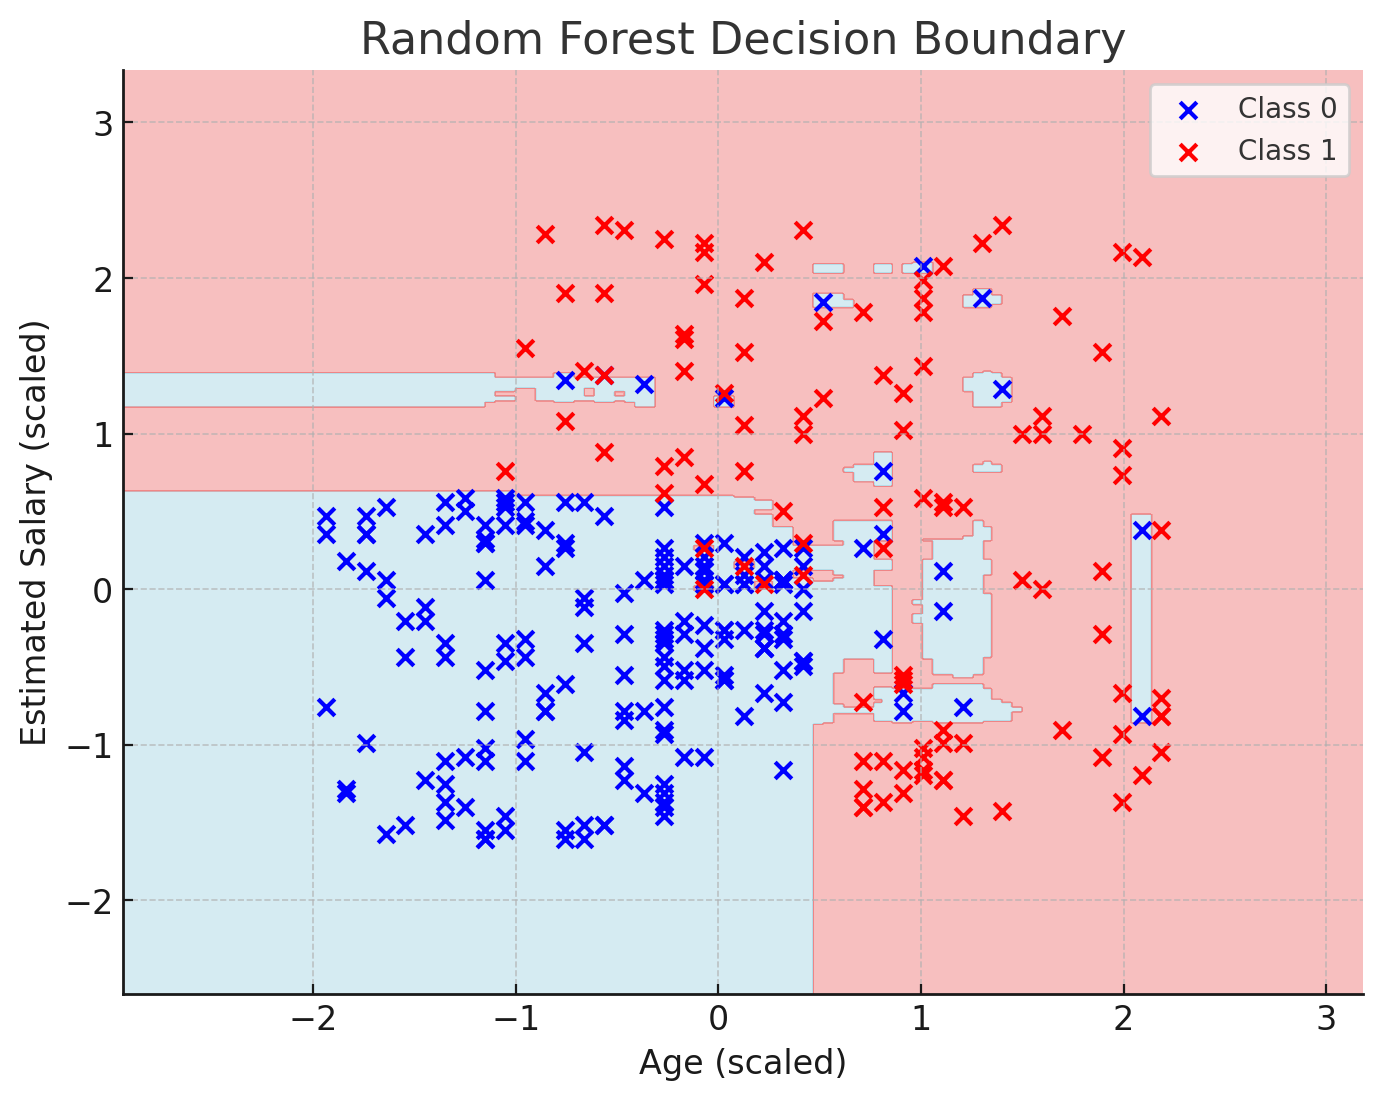

# IMPORT 📌📌📌

In [1]:
import numpy as np  # 📌 Import numpy library for numerical computations
import pandas as pd  # 📌 Import pandas library for handling datasets
import matplotlib.pyplot as plt  # 📌 Import matplotlib for data visualization
import seaborn as sns  # 📌 Import seaborn for enhanced data visualization
from sklearn.model_selection import train_test_split, GridSearchCV  # 📌 Import functions for dataset splitting and hyperparameter tuning
from sklearn.preprocessing import StandardScaler  # 📌 Import StandardScaler for feature scaling
from sklearn.ensemble import RandomForestClassifier  # 📌 Import RandomForestClassifier for classification tasks
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix  # 📌 Import metrics for model evaluation

# 🚀 1. Load and preprocess the dataset

In [3]:
# 🚀 1. Load and preprocess the dataset
file_path = "Social_Network_Ads.csv"  # 📌 Define the file path for the dataset
df = pd.read_csv(file_path)  # 📌 Read the dataset into a pandas DataFrame
X = df[['Age', 'EstimatedSalary']].values  # 📌 Extract independent features (Age, Estimated Salary)
y = df['Purchased'].values  # 📌 Extract the target variable (Purchased)

# 🔹 Split dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # 📌 Split data into training and testing sets

# 🔹 Standardize features
sc = StandardScaler()  # 📌 Initialize StandardScaler for feature normalization
X_train = sc.fit_transform(X_train)  # 📌 Fit and transform training features
X_test = sc.transform(X_test)  # 📌 Transform testing features using the same scaler


🎯 2. Hyperparameter tuning for Random Forest

In [4]:
# 🎯 2. Hyperparameter tuning for Random Forest
param_grid = {  # 📌 Define hyperparameter grid for tuning
    'n_estimators': [50, 100, 200],  # 📌 Number of trees in the forest
    'max_depth': [None, 10, 20],  # 📌 Maximum depth of the trees
    'min_samples_split': [2, 5, 10]  # 📌 Minimum number of samples required to split an internal node
}

rf = RandomForestClassifier(random_state=42)  # 📌 Initialize RandomForestClassifier
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)  # 📌 Perform grid search for best hyperparameters
grid_search.fit(X_train, y_train)  # 📌 Fit the model using training data

# 🔥 Best model selection
best_rf = grid_search.best_estimator_  # 📌 Retrieve the best estimator found by GridSearchCV

#✅✅✅ Training the Random Forest Classification model on the Training set

In [5]:

# ✅ 3. Model Performance Evaluation
y_pred = best_rf.predict(X_test)  # 📌 Predict target values for test set
y_pred_train = best_rf.predict(X_train)  # 📌 Predict target values for train set

# 📊 Compute Metrics
def compute_metrics(y_true, y_pred):  # 📌 Define function to compute performance metrics
    return {
        'Accuracy': accuracy_score(y_true, y_pred),  # 📌 Compute accuracy score
        'Precision': precision_score(y_true, y_pred),  # 📌 Compute precision score
        'Recall': recall_score(y_true, y_pred),  # 📌 Compute recall score
        'F1 Score': f1_score(y_true, y_pred),  # 📌 Compute F1 score
        'ROC-AUC': roc_auc_score(y_true, y_pred)  # 📌 Compute ROC-AUC score
    }

metrics_train = compute_metrics(y_train, y_pred_train)  # 📌 Compute metrics for training set
metrics_test = compute_metrics(y_test, y_pred)  # 📌 Compute metrics for test set

# 📋 Create DataFrame for metrics
metrics_df = pd.DataFrame([metrics_train, metrics_test], index=['Train', 'Test'])  # 📌 Create DataFrame with performance metrics
print("Performance Metrics:\n", metrics_df)  # 📌 Print the performance metrics

Performance Metrics:
        Accuracy  Precision    Recall  F1 Score   ROC-AUC
Train  0.926667   0.868421  0.933962  0.900000  0.928321
Test   0.940000   0.878049  0.972973  0.923077  0.946804


🎯 4. Confusion Matrix Visualization

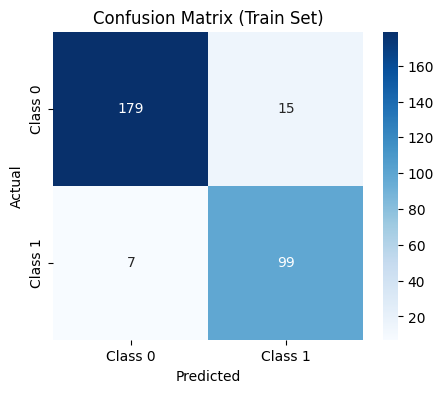

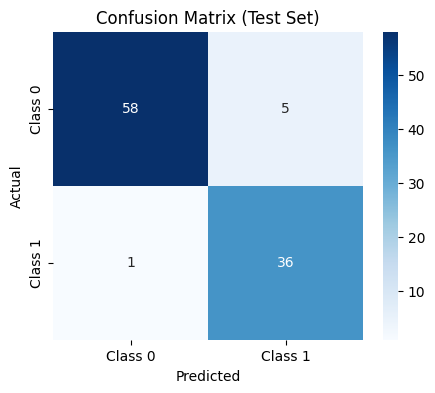

In [9]:
# 🎯 4. Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred, title):  # 📌 Define function to plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)  # 📌 Compute confusion matrix
    plt.figure(figsize=(5, 4))  # 📌 Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])  # 📌 Create heatmap for confusion matrix
    plt.xlabel('Predicted')  # 📌 Label x-axis
    plt.ylabel('Actual')  # 📌 Label y-axis
    plt.title(title)  # 📌 Set title
    plt.show()  # 📌 Display plot

# 🔵 Confusion Matrix for Train Set
plot_confusion_matrix(y_train, y_pred_train, "Confusion Matrix (Train Set)")  # 📌 Plot confusion matrix for training set

# 🔴 Confusion Matrix for Test Set
plot_confusion_matrix(y_test, y_pred, "Confusion Matrix (Test Set)")  # 📌 Plot confusion matrix for test set


# 🛠 5. Decision Boundary Function

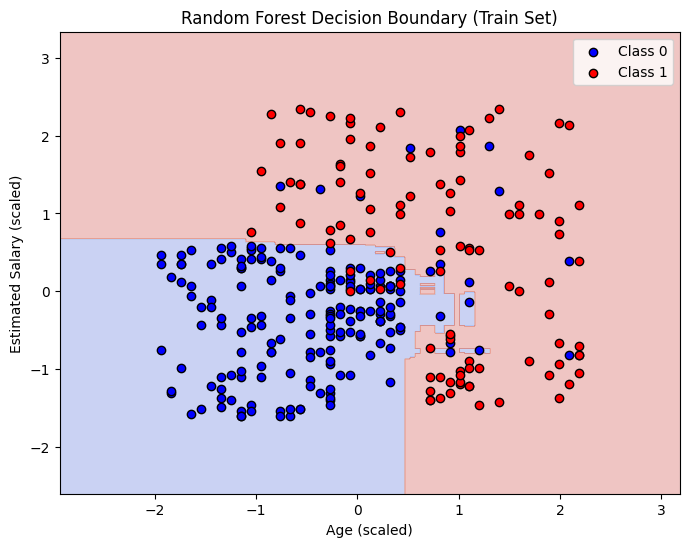

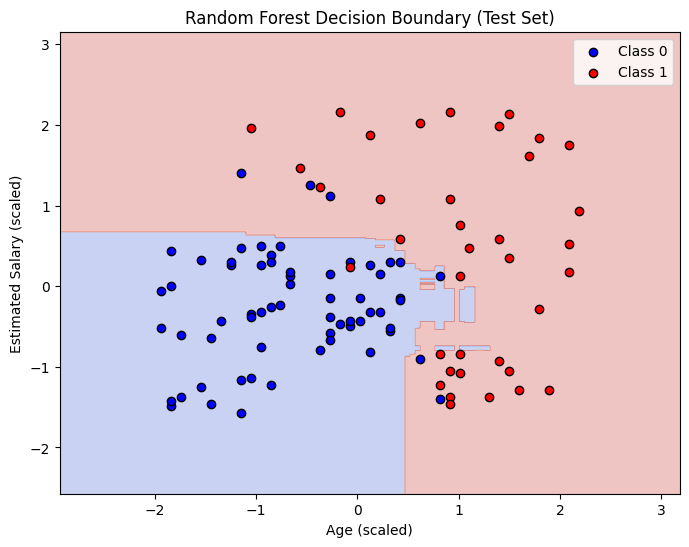

In [11]:
# 🛠 5. Decision Boundary Function
def plot_decision_boundary(X, y, model, title):  # 📌 Define function to visualize decision boundary
    X1, X2 = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                         np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))  # 📌 Create meshgrid for plotting
    plt.figure(figsize=(8, 6))  # 📌 Set figure size
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.3, cmap='coolwarm')  # 📌 Plot decision boundary
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Class 0', edgecolors='k')  # 📌 Plot class 0 points
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1', edgecolors='k')  # 📌 Plot class 1 points
    plt.title(title)  # 📌 Set title
    plt.xlabel('Age (scaled)')  # 📌 Label x-axis
    plt.ylabel('Estimated Salary (scaled)')  # 📌 Label y-axis
    plt.legend()  # 📌 Show legend
    plt.show()  # 📌 Display plot

# 🔵 Decision Boundary for Train Set
plot_decision_boundary(X_train, y_train, best_rf, "Random Forest Decision Boundary (Train Set)")  # 📌 Plot decision boundary for training set

# 🔴 Decision Boundary for Test Set
plot_decision_boundary(X_test, y_test, best_rf, "Random Forest Decision Boundary (Test Set)")  # 📌 Plot decision boundary for test set
